In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import torch

In this example we are trying to optimize a noisy 1D function

In [4]:
def func1d(x):
    return np.log(1 + np.abs(x)**(2+np.sin(x)))
    

In [60]:
xmin,xmax,xstep = -12.5,12.5,0.02
x0 = random.randint(int(xmin),int(xmax))
x0 = 11
minima_x = 0.0
x_points = np.arange(xmin,xmax,xstep)


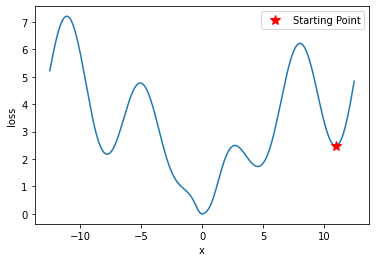

In [61]:
plot(x_points,func1d(x_points))
xlabel('x')
ylabel('loss')
#plot(minima_x,dropWave1D(minima_x),'o',markersize=10,label='Minima')
plot(x0,func1d(x0),'r*',markersize=10,label='Starting Point')

legend()

In [64]:
epochs = 20000
learning_rate = 0.05
path_x, path_fx, vel_track = [], [], []
beta1 = 0.9
beta2 = 0.999


# make sure you set initial point correctly
x = torch.tensor(x0,dtype=torch.float32,requires_grad=True)
optimizer = torch.optim.Adam([x],lr=learning_rate,betas=(beta1,beta2))

xmin = -12.
xmax = 12.0

# Make gradient descent stochastic
pmess=0.3
lr_scale = 0.01 # learning rate scaler


for epoch in range(0,epochs):
        
    # ***** helper for visualization purposes *****
    with torch.no_grad():
        x_numpy = x.detach().numpy()
        path_x.append(np.copy(x_numpy))
        path_fx.append(func1d(np.copy(x_numpy)))
    # *********************************************

    # loss
    if np.random.rand() <= pmess : #0.30:
        xrand = xmin + (xmax-xmin)*torch.rand(1)
        loss = torch.log(1 + (torch.abs(x-xrand)**(2 + torch.sin(x-xrand))))
    else:
        if epoch > 4000:
            loss = lr_scale * torch.log(1 + (torch.abs(x)**(2 + torch.sin(x))))
        else: 
            loss = torch.log(1 + (torch.abs(x)**(2 + torch.sin(x))))
    # calculate gradients
    loss.backward()
    
    # Update params
    optimizer.step()
    
    # make gradients zeros
    x.grad.data.zero_()
    
minima_x = x.item()

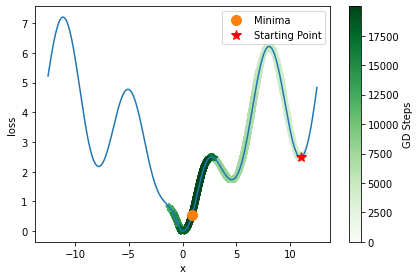

In [65]:
plot(x_points,func1d(x_points))
xlabel('x')
ylabel('loss')
plot(minima_x,func1d(minima_x),'o',markersize=10,label='Minima')
plot(x0,func1d(x0),'r*',markersize=10,label='Starting Point')

scatter(np.array(path_x),np.array(path_fx),c=list(range(len(path_x))),marker='*',s=40,cmap=cm.Greens,rasterized=True)
colorbar(label='GD Steps')
legend()    
tight_layout()
#title('Best::{:.3g}'.format(x.item()))
#savefig(r'/home/dia021/Documents/MessUp/TeX/images/Noisy1D_NoMessUp.png')